# **Phishing Website Detection Using ML Techniques**

## **1. Objective:**
Phishing website is one of the internet security problems that target the human vulnerabilities rather than software vulnerabilities. It can be described as the process of attracting online users to obtain their sensitive information such as usernames and passwords. The objective of this project is to train machine learning models and deep neural networks on the dataset created to predict phishing websites. Both phishing and legitimate URLs of websites are gathered to form a dataset and from them required URL and website content-based features are extracted. The performance level of each model is measured and compared.

## **2. Loading Data:**

The features are extracted and saved as a csv file. The working of this can be seen in the **'URL Feature Extraction from Datasets.ipynb'** file.

The resulted csv file is uploaded to this notebook and stored in the dataframe.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
tuna = pd.read_csv(r'C:\Users\Hp\Documents\Final Year Project\Phishing Website Detection\ML Work\DataSets\urldata.csv')
tuna.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,1,0,0,1,0,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,1,0,0,1,0,0


## **3. Familiarizing with Data**
In this step, few dataframe methods are used to look into the data and its features.

In [3]:
tuna.shape

(10000, 16)

In [4]:
tuna.columns

Index(['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
       'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record',
       'Web_Traffic', 'iFrame', 'Mouse_Over', 'Right_Click', 'Web_Forwards',
       'Label'],
      dtype='object')

In [5]:
tuna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Domain         10000 non-null  object
 1   Have_IP        10000 non-null  int64 
 2   Have_At        10000 non-null  int64 
 3   URL_Length     10000 non-null  int64 
 4   URL_Depth      10000 non-null  int64 
 5   Redirection    10000 non-null  int64 
 6   https_Domain   10000 non-null  int64 
 7   TinyURL        10000 non-null  int64 
 8   Prefix/Suffix  10000 non-null  int64 
 9   DNS_Record     10000 non-null  int64 
 10  Web_Traffic    10000 non-null  int64 
 11  iFrame         10000 non-null  int64 
 12  Mouse_Over     10000 non-null  int64 
 13  Right_Click    10000 non-null  int64 
 14  Web_Forwards   10000 non-null  int64 
 15  Label          10000 non-null  int64 
dtypes: int64(15), object(1)
memory usage: 1.2+ MB


## **4. Visualizing the data**
Few plots and graphs are displayed to find how the data is distributed and the how features are related to each other.

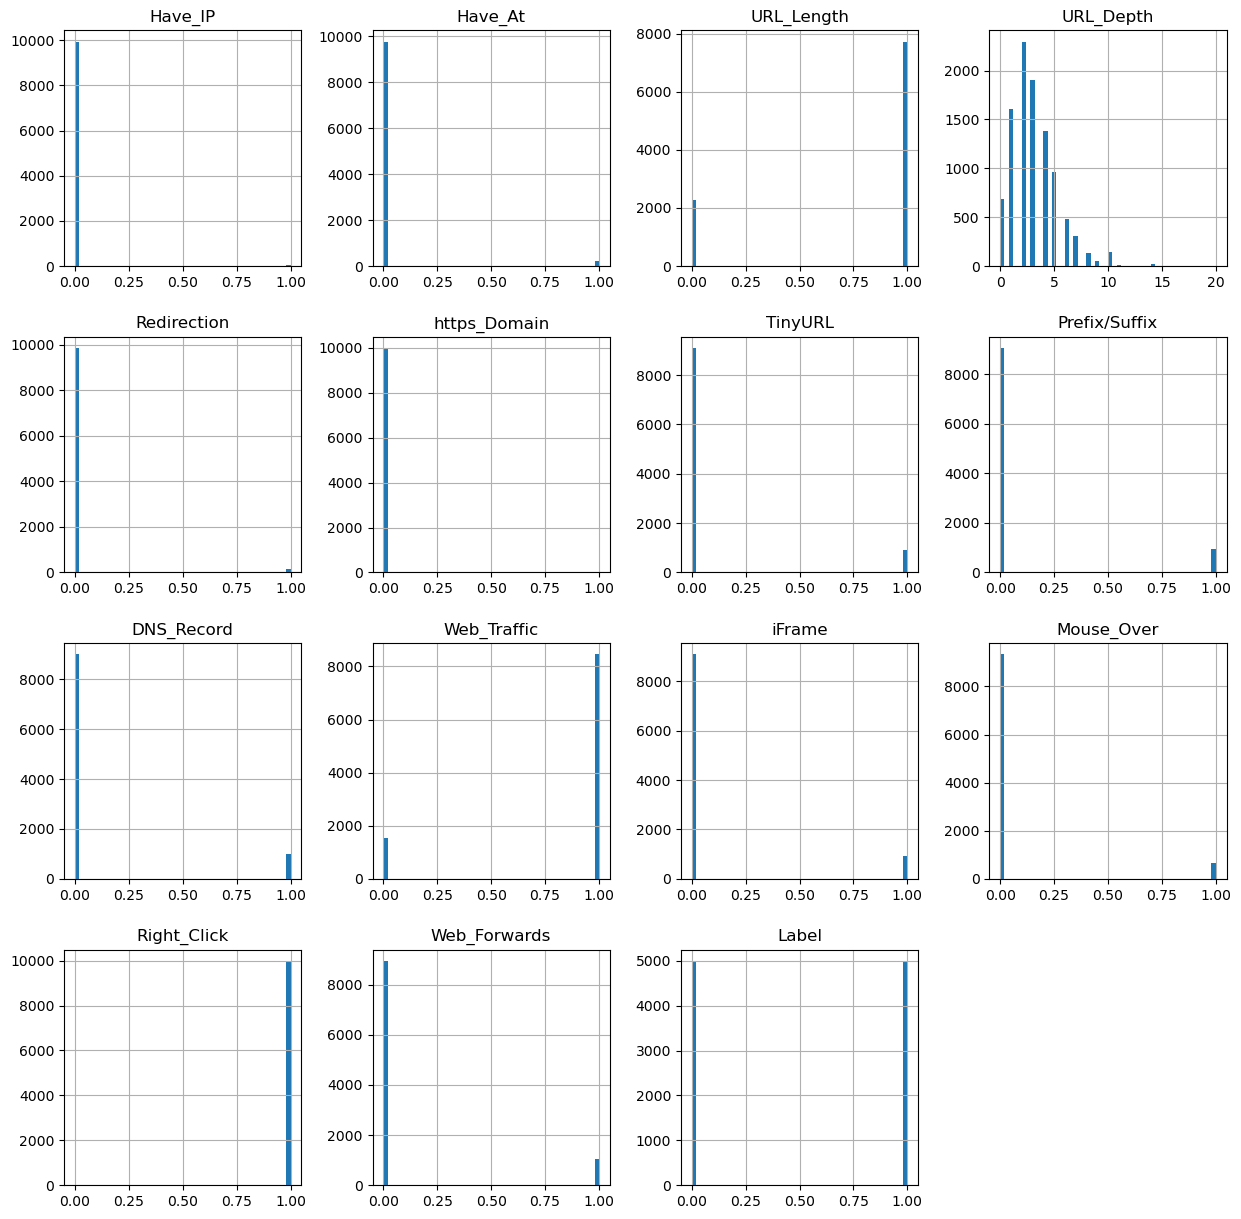

In [6]:
#Plotting the data distribution

tuna.hist(bins = 50,figsize = (15,15))
plt.show()

C:\Users\Hp\AppData\Local\Temp\ipykernel_9032\1156250005.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(tuna.corr())


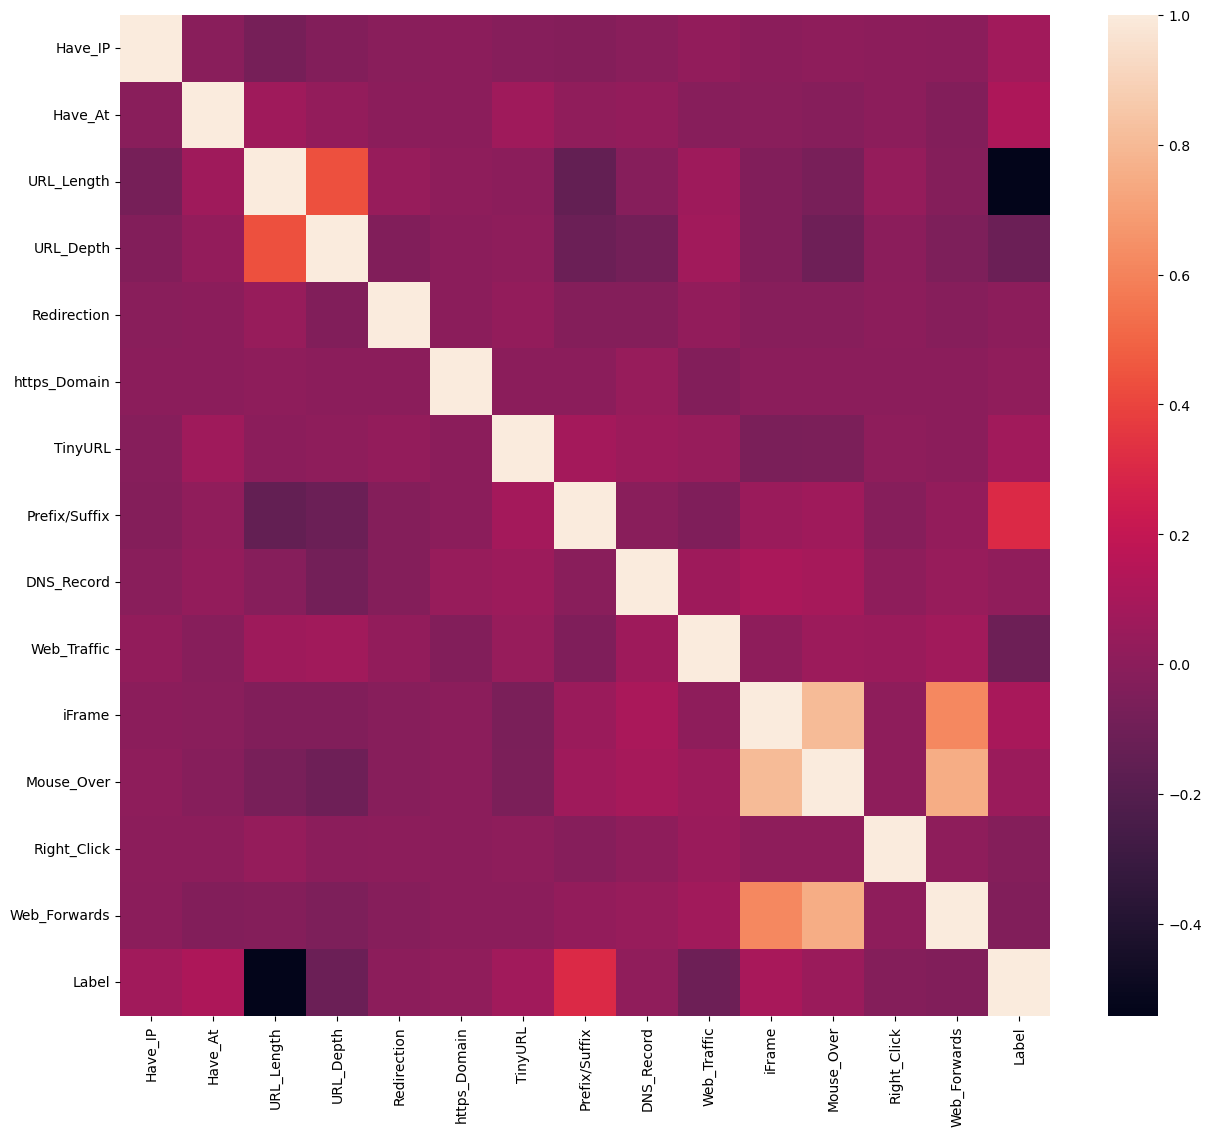

In [7]:
#Correlation heatmap

plt.figure(figsize=(15,13))
sns.heatmap(tuna.corr())
plt.show()

## **5. Data Preprocessing & EDA**
Here, we clean the data by applying data preprocesssing techniques and transform the data to use it in the models.

In [8]:
tuna.describe()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000
mean,0.005500,0.022600,0.773400,3.072000,0.013500,0.000200,0.090300,0.093200,0.100800,0.845700,0.090900,0.06660,0.99930,0.105300,0.500000
std,0.073961,0.148632,0.418653,2.128631,0.115408,0.014141,0.286625,0.290727,0.301079,0.361254,0.287481,0.24934,0.02645,0.306955,0.500025
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,1.00000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,1.00000,0.000000,0.500000
75%,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,1.00000,0.000000,1.000000
max,1.000000,1.000000,1.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000


The above obtained result shows that the most of the data is made of 0's & 1's except 'Domain' & 'URL_Depth' columns. The Domain column doesnt have any significance to the machine learning model training. So dropping the *'Domain'* column from the dataset. 

In [9]:
dfsa = tuna.drop(['Domain'], axis = 1).copy()

This leaves us with 14 features & a target column. The *'URL_Depth'* maximum value is 20.

In [10]:
#checking the data for null or missing values
dfsa.isnull().sum()

Have_IP          0
Have_At          0
URL_Length       0
URL_Depth        0
Redirection      0
https_Domain     0
TinyURL          0
Prefix/Suffix    0
DNS_Record       0
Web_Traffic      0
iFrame           0
Mouse_Over       0
Right_Click      0
Web_Forwards     0
Label            0
dtype: int64

In the feature extraction file, the extracted features of legitmate & phishing url datasets are just concatenated without any shuffling. This resulted in top 5000 rows of legitimate url data & bottom 5000 of phishing url data. 

To even out the distribution while splitting the data into training & testing sets, we need to shuffle it. This even evades the case of overfitting while model training.

In [11]:
# shuffling

dfsa = dfsa.sample(frac=1).reset_index(drop=True)
dfsa.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,0,0,1,3,0,0,0,0,1,1,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1
2,0,0,1,7,0,0,0,0,0,1,0,0,1,0,1
3,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0
4,0,0,1,3,0,0,0,0,1,1,0,0,1,0,0


Hence, from our Dataset above, it is clear that the data does not have any missing values.

Thus, the data is throughly preprocessed & is ready for training.

## **6. Splitting the Data**

In [12]:
# Sepratating & assigning features and target columns to X & y
y = dfsa['Label']  #target variable
X = dfsa.drop('Label',axis=1)  #independent variable


In [13]:
# Checking the shape for X, y variable 
X.shape, y.shape

((10000, 14), (10000,))

In [14]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)  #test-size 20%
X_train.shape, X_test.shape

((8000, 14), (2000, 14))

## **7. Machine Learning Models & Training**

From the dataset above, it is clear that this is a supervised machine learning task. There are two major types of supervised machine learning problems, called classification and regression. 

This data set comes under classification problem, as the input URL is classified as phishing (1) or legitimate (0). The supervised machine learning models (classification) considered to train the dataset in this notebook are:
* Decision Tree
* Random Forest
* Multilayer Perceptrons
* XGBoost
* Autoencoder Neural Network
* Support Vector Machines

In [15]:
from sklearn.metrics import accuracy_score

In [16]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

### **7.1. Decision Tree Classifier**
 Decision trees are widely used models for classification and regression tasks. Essentially, they learn a hierarchy of if/else questions, leading to a decision. Learning a decision tree means learning the sequence of if/else questions that gets us to the true answer most quickly.
 
In the machine learning setting, these questions are called tests (not to be confused with the test set, which is the data we use to test to see how generalizable our model is). To build a tree, the algorithm searches over all possible tests and finds the one that is most informative about the target variable.

In [17]:
# Decision Tree model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth = 7)

# fit the model 
tree.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=7)

In [18]:
#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

**Performance Evaluation:**

In [19]:
#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 0.824
Decision Tree: Accuracy on test Data: 0.821


**Storing the results:**

In [20]:
storeResults('Decision Tree', acc_train_tree, acc_test_tree)

### **7.2. Random Forest Classifier**
Random forests for regression and classification are currently among the most widely used machine learning methods.A random forest is essentially a collection of decision trees, where each tree is slightly different from the others. The idea behind random forests is that each tree might do a relatively good job of predicting, but will likely overfit on part of the data.

If we build many trees, all of which work well and overfit in different ways, we can reduce the amount of overfitting by averaging their results. To build a random forest model, you need to decide on the number of trees to build (the n_estimators parameter of RandomForestRegressor or RandomForestClassifier). They are very powerful, often work well without heavy tuning of the parameters, and don’t require scaling of the data.

In [21]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(max_depth=7)

forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=7)

In [22]:
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

**Performance Evaluation:**

In [23]:
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 0.828
Random forest: Accuracy on test Data: 0.823


**Storing the results:**

In [24]:
storeResults('Random Forest', acc_train_forest, acc_test_forest)

### **7.3. Multilayer Perceptrons (MLPs): Deep Learning**
Multilayer perceptrons (MLPs) are also known as (vanilla) feed-forward neural networks, or sometimes just neural networks. Multilayer perceptrons can be applied for both classification and regression problems.

MLPs can be viewed as generalizations of linear models that perform multiple stages of processing to come to a decision.

In [25]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=([100,100,100]))

mlp.fit(X_train, y_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=[100, 100, 100])

In [26]:
y_test_mlp = mlp.predict(X_test)
y_train_mlp = mlp.predict(X_train)

**Performance Evaluation:**

In [27]:
acc_train_mlp = accuracy_score(y_train,y_train_mlp)
acc_test_mlp = accuracy_score(y_test,y_test_mlp)

print("Multilayer Perceptrons: Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multilayer Perceptrons: Accuracy on test Data: {:.3f}".format(acc_test_mlp))

Multilayer Perceptrons: Accuracy on training Data: 0.840
Multilayer Perceptrons: Accuracy on test Data: 0.834


**Storing the results:**

In [28]:
storeResults('Multilayer Perceptrons', acc_train_mlp, acc_test_mlp)

### **7.4. XGBoost Classifier**
XGBoost is one of the most popular machine learning algorithms these days. XGBoost stands for eXtreme Gradient Boosting. Regardless of the type of prediction task at hand; regression or classification. XGBoost is an implementation of gradient boosted decision trees designed for speed and performance.

In [29]:
!pip install xgboost

In [30]:
from xgboost import XGBClassifier

xgb = XGBClassifier(learning_rate=0.4,max_depth=7)

xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [31]:
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

**Performance Evaluation:**

In [32]:
acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_test_xgb = accuracy_score(y_test,y_test_xgb)

print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_xgb))

XGBoost: Accuracy on training Data: 0.844
XGBoost : Accuracy on test Data: 0.836


**Storing the results:**

In [33]:
storeResults('XGBoost', acc_train_xgb, acc_test_xgb)

### **7.5. Autoencoder Neural Network**
An auto encoder is a neural network that has the same number of input neurons as it does outputs. The hidden layers of the neural network will have fewer neurons than the input/output neurons. Because there are fewer neurons, the auto-encoder must learn to encode the input to the fewer hidden neurons. The predictors (x) and output (y) are exactly the same in an auto encoder.

In [34]:
import keras
from keras.layers import Input, Dense
from keras import regularizers
import tensorflow as tf
from keras.models import Model
from sklearn import metrics

In [35]:
#building autoencoder model

input_dim = X_train.shape[1]
encoding_dim = input_dim

input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="relu",
                activity_regularizer=regularizers.l1(10e-4))(input_layer)
encoder = Dense(int(encoding_dim), activation="relu")(encoder)

encoder = Dense(int(encoding_dim-2), activation="relu")(encoder)
code = Dense(int(encoding_dim-4), activation='relu')(encoder)
decoder = Dense(int(encoding_dim-2), activation='relu')(code)

decoder = Dense(int(encoding_dim), activation='relu')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 14)]              0         
                                                                 
 dense (Dense)               (None, 14)                210       
                                                                 
 dense_1 (Dense)             (None, 14)                210       
                                                                 
 dense_2 (Dense)             (None, 12)                180       
                                                                 
 dense_5 (Dense)             (None, 14)                182       
                                                                 
 dense_6 (Dense)             (None, 14)                210       
                                                                 
Total params: 992
Trainable params: 992
Non-trainable params:

In [36]:
#compiling the model
autoencoder.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

#Training the model
history = autoencoder.fit(X_train, X_train, epochs=10, batch_size=64, shuffle=True, validation_split=0.2) 

Epoch 1/10
100/100 [==============================] - 4s 12ms/step - loss: 0.0876 - accuracy: 0.8173 - val_loss: -0.7832 - val_accuracy: 0.8531
Epoch 2/10
100/100 [==============================] - 0s 4ms/step - loss: -1.7429 - accuracy: 0.8477 - val_loss: -1.8745 - val_accuracy: 0.8544
Epoch 3/10
100/100 [==============================] - 0s 4ms/step - loss: -1.9682 - accuracy: 0.8517 - val_loss: -1.9335 - val_accuracy: 0.8544
Epoch 4/10
100/100 [==============================] - 0s 4ms/step - loss: -1.9897 - accuracy: 0.8509 - val_loss: -1.9409 - val_accuracy: 0.8537
Epoch 5/10
100/100 [==============================] - 0s 4ms/step - loss: -2.0257 - accuracy: 0.8358 - val_loss: -1.9764 - val_accuracy: 0.8206
Epoch 6/10
100/100 [==============================] - 0s 4ms/step - loss: -2.0462 - accuracy: 0.7444 - val_loss: -1.9950 - val_accuracy: 0.6144
Epoch 7/10
100/100 [==============================] - 0s 4ms/step - loss: -2.0645 - accuracy: 0.6003 - val_loss: -2.0043 - val_accuracy:

**Performance Evaluation:**

In [37]:
acc_train_auto = autoencoder.evaluate(X_train, X_train)[1]
acc_test_auto = autoencoder.evaluate(X_test, X_test)[1]

print('\nAutoencoder: Accuracy on training Data: {:.3f}' .format(acc_train_auto))
print('Autoencoder: Accuracy on test Data: {:.3f}' .format(acc_test_auto))

63/63 [==============================] - 0s 5ms/step - loss: -1.9293 - accuracy: 0.4265

Autoencoder: Accuracy on training Data: 0.445
Autoencoder: Accuracy on test Data: 0.426


**Storing the results:**

In [38]:
storeResults('AutoEncoder', acc_train_auto, acc_test_auto)

### **7.6. Support Vector Machines**

In machine learning, support-vector machines (SVMs, also support-vector networks) are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier.

In [39]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=12)

svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=12)

In [40]:
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)

**Performance Evaluation:**

In [41]:
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)

print("SVM: Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("SVM : Accuracy on test Data: {:.3f}".format(acc_test_svm))

SVM: Accuracy on training Data: 0.802
SVM : Accuracy on test Data: 0.799


**Storing the results:**

In [42]:
storeResults('SVM', acc_train_svm, acc_test_svm)

## **8. Comparision of Models**
To compare the models performance, a dataframe is created. The columns of this dataframe are the lists created to store the results of the model.

In [43]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,    
                         'Train Accuracy': acc_train,
                        'Test Accuracy': acc_test})
results

,ML Model,Train Accuracy,Test Accuracy
0,Decision Tree,0.824,0.820
1,Random Forest,0.828,0.822
2,Multilayer Perceptrons,0.840,0.834
3,XGBoost,0.844,0.836
4,AutoEncoder,0.445,0.426
5,SVM,0.802,0.799


In [44]:
#Sorting the datafram on accuracy
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy
3,XGBoost,0.844,0.836
2,Multilayer Perceptrons,0.840,0.834
1,Random Forest,0.828,0.822
0,Decision Tree,0.824,0.820
5,SVM,0.802,0.799
4,AutoEncoder,0.445,0.426


For the above comparision, it is clear that the XGBoost Classifier works well with this dataset.

So, saving the model for future use.

In [45]:
# save XGBoost model to file
import pickle
pickle.dump(xgb, open("XGBoostClassifier.pickle.dat", "wb"))

**Testing the saved model:**

In [46]:
# load model from file
loaded_model = pickle.load(open("XGBoostClassifier.pickle.dat", "rb"))
loaded_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)